In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Plantsdata.csv')

In [159]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We can see there are NaN values present in the dataset.

In [160]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [162]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

* estimated_generation_gwh,other_fuel1,other_fuel2,other_fuel3,wepp_id has most of data as NaN.Hence imputing them will not
help the model perform well so we need to drop these columns.

In [4]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [164]:
df.shape

(908, 20)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_data_source'>

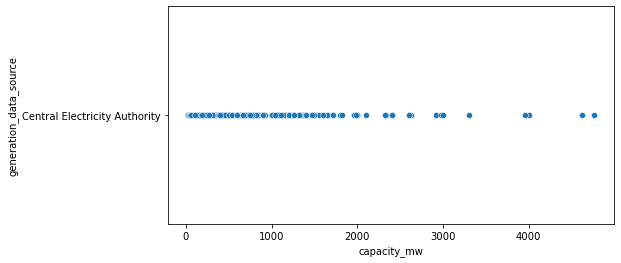

In [165]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_data_source',data=df)

* central electricity authority and NaN are the only type of generation_data_source so we can drop it as it wont help in predicting capacity_mw.

In [9]:
df.generation_data_source.unique()

array([nan, 'Central Electricity Authority'], dtype=object)

* Dropping the columns which are not related for prediction.i.e. gppd_idnr,owner,generation_data_source.

In [6]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [47]:
df['year_of_capacity_data'].nunique()

1

* also removing column 'year_of_capacity_data' because it is having one unique value across all the records.

In [7]:
# dropping 'year_of_capacity_data' column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [64]:
df['name'].nunique()

908

* also dropping name column and url columns as there is no use of it.

In [8]:
df.drop(['name','url'],axis=1,inplace=True)

In [50]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [10]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [97]:
df['geolocation_source'].mode()[0]

'WRI'

In [9]:
# filling null values with median in numerical columns
df.fillna(df.median(), inplace=True)

In [53]:
df.median()

capacity_mw              60.000000
latitude                 21.778300
longitude                76.719250
commissioning_year     2000.000000
generation_gwh_2013     797.063475
generation_gwh_2014     805.760000
generation_gwh_2015     701.027250
generation_gwh_2016     716.728350
generation_gwh_2017     807.601700
dtype: float64

* dropping the 'country' and 'country_long' column as it has only one variant for all records.

In [5]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [11]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,Wind,2000.0,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,Wind,2000.0,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700


In [12]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [17]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [18]:
df['source'].nunique()

191

In [98]:
df['geolocation_source'].nunique()

3

In [60]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [100]:
df['geolocation_source'].value_counts()

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [21]:
df['country'].nunique()

1

In [22]:
df['country_long'].nunique()

1

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [30]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

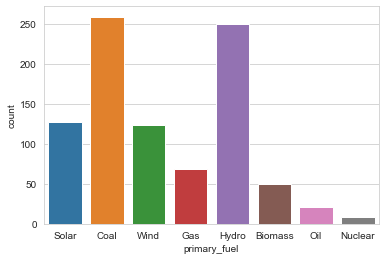

In [27]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

<AxesSubplot:>

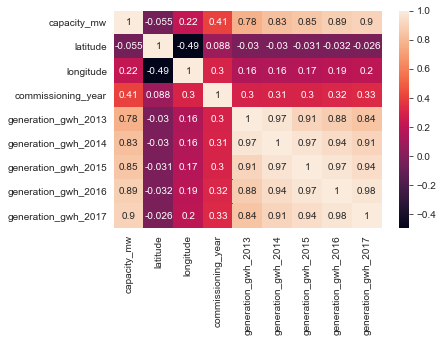

In [33]:
sns.heatmap(df.corr(),annot=True)

* Here we can notice generation_gwh_2013,2014,2015,2016,2017 are positively correlated to capacity_mw and 
latitude is negative correlated.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

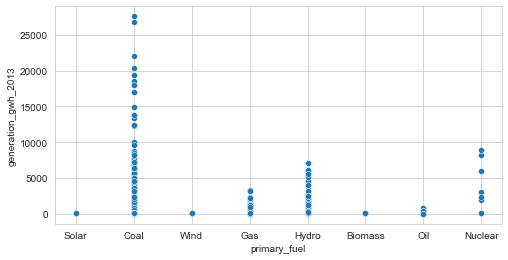

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

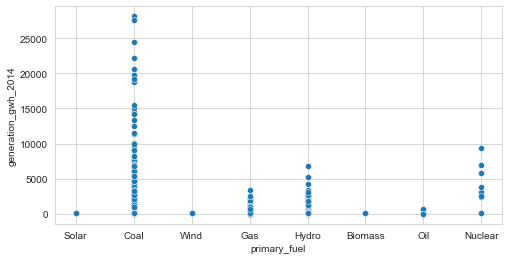

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

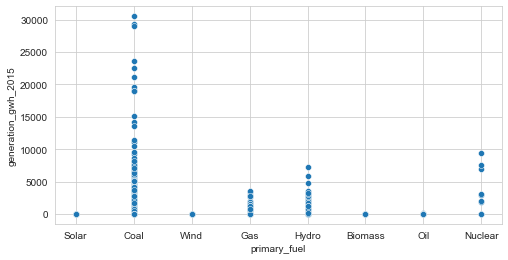

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

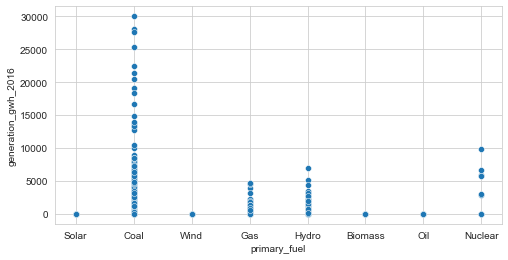

In [43]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

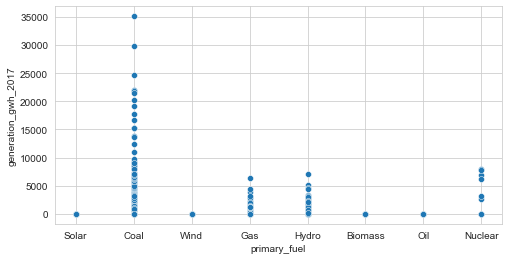

In [44]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

* the coal is most used fuel in between 2013 to 2014 and Nuclear,Gas and hydro on average use and Solar,Wind,Biomass,Oil was very less used as compared to the others.

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

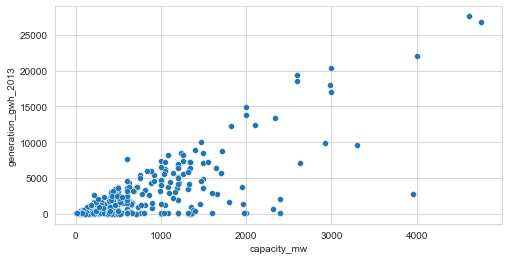

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

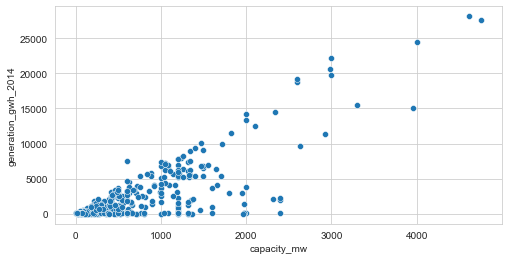

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

* in 2014 we can also notice here as electricity generation in gigawatt-hour is increasing with increasing in the no of electricity generating capacity in megawatts in 2014

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

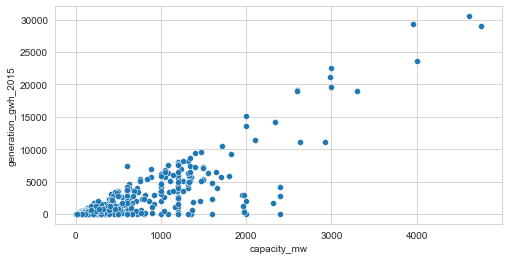

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

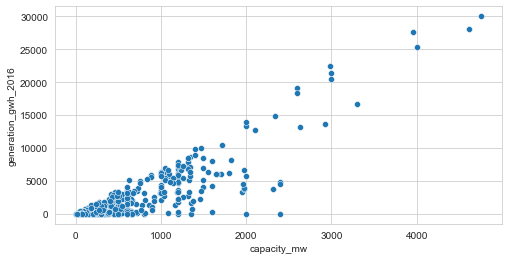

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

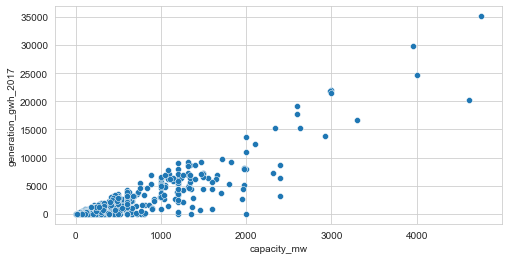

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

* From 2013 to 2014 with increase in generation_gwh,the capacity_mw also increases

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

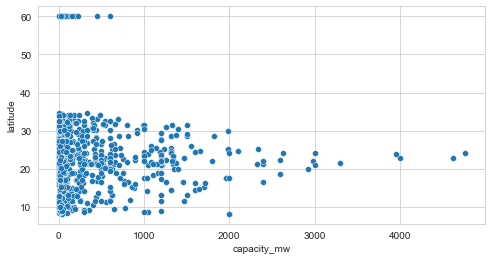

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

* In high latitude value, capacity is low.With latitude between 20 and 30,we see increase in capacity.

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

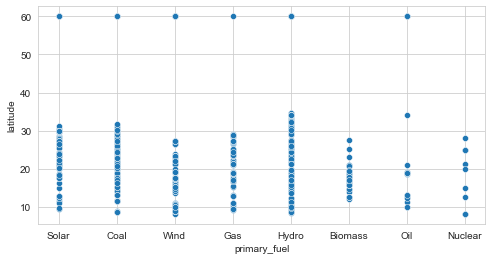

In [47]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

* Most of the primary fuel are present under the latitude range under 35.

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

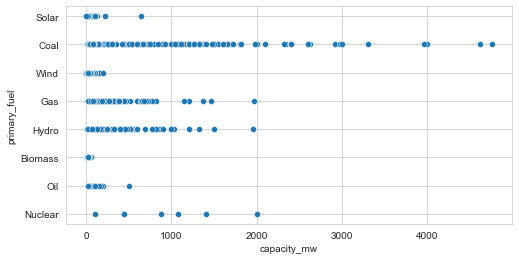

In [48]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

* coal is used for maximum electricity generation.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
LE = LabelEncoder()
df['geolocation_source'] = LE.fit_transform(df['geolocation_source'])

In [15]:
df['source'] = LE.fit_transform(df['source'])

In [16]:
df['primary_fuel'] = LE.fit_transform(df['primary_fuel'])

In [17]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,109,1,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,1,2000.0,174,2,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,7,2000.0,21,2,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,2,2004.0,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,22,2,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2000.0,77,0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,7,2000.0,21,2,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,1,2000.0,59,2,797.063475,805.760000,701.027250,716.728350,807.601700


<AxesSubplot:>

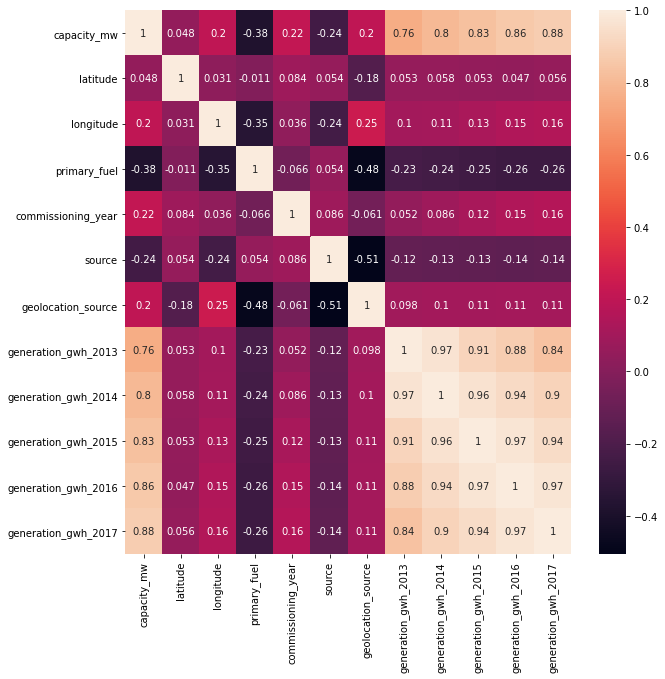

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

capacity_mw               AxesSubplot(0.125,0.657941;0.168478x0.222059)
latitude               AxesSubplot(0.327174,0.657941;0.168478x0.222059)
longitude              AxesSubplot(0.529348,0.657941;0.168478x0.222059)
primary_fuel           AxesSubplot(0.731522,0.657941;0.168478x0.222059)
commissioning_year        AxesSubplot(0.125,0.391471;0.168478x0.222059)
source                 AxesSubplot(0.327174,0.391471;0.168478x0.222059)
geolocation_source     AxesSubplot(0.529348,0.391471;0.168478x0.222059)
generation_gwh_2013    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
generation_gwh_2014          AxesSubplot(0.125,0.125;0.168478x0.222059)
generation_gwh_2015       AxesSubplot(0.327174,0.125;0.168478x0.222059)
generation_gwh_2016       AxesSubplot(0.529348,0.125;0.168478x0.222059)
generation_gwh_2017       AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

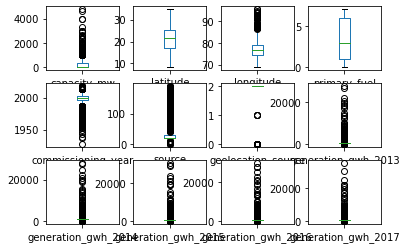

In [33]:
df.plot(kind='box',subplots=True,layout=(3,4))  

In [18]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]))
threshold = 3
df = df[(z<3).all(axis = 1)]

In [19]:
df.shape

(889, 12)

In [178]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,109,1,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,1,2000.0,174,2,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,7,2000.0,21,2,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,2,2004.0,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,22,2,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2000.0,77,0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,7,2000.0,21,2,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,1,2000.0,59,2,797.063475,805.760000,701.027250,716.728350,807.601700


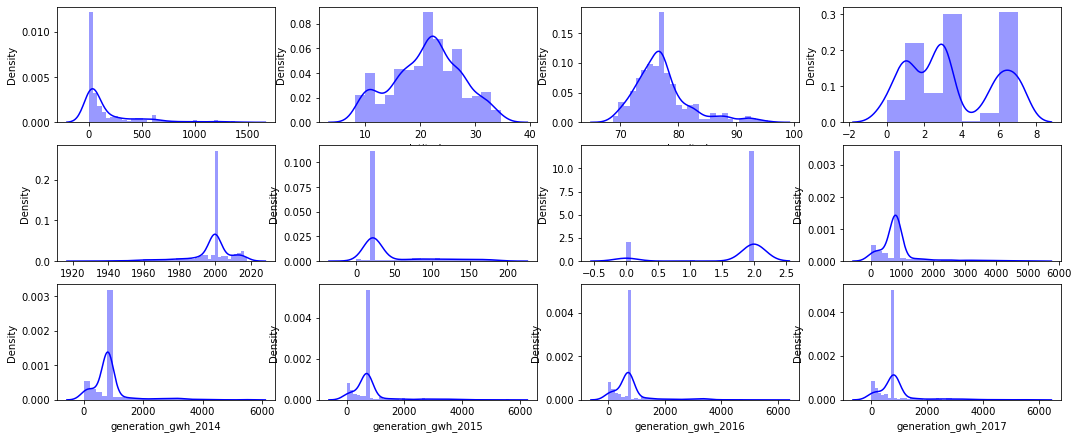

In [162]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [72]:
df.skew()

capacity_mw            2.199138
latitude              -0.152882
longitude              1.208901
primary_fuel           0.437793
commissioning_year    -1.647324
source                 1.795224
geolocation_source    -2.125933
generation_gwh_2013    3.163036
generation_gwh_2014    3.005844
generation_gwh_2015    2.782405
generation_gwh_2016    2.702530
generation_gwh_2017    2.596006
dtype: float64

* We will remove the skewness of the most correlated predictors in the data using power transform.

In [164]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [75]:
from sklearn.preprocessing import power_transform

In [179]:
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

In [183]:
df.skew()

capacity_mw            0.015904
latitude              -0.152882
longitude              1.208901
primary_fuel           0.437793
commissioning_year    -1.647324
source                 1.795224
geolocation_source    -2.125933
generation_gwh_2013    0.276839
generation_gwh_2014    0.232123
generation_gwh_2015    0.168839
generation_gwh_2016    0.150575
generation_gwh_2017    0.129610
dtype: float64

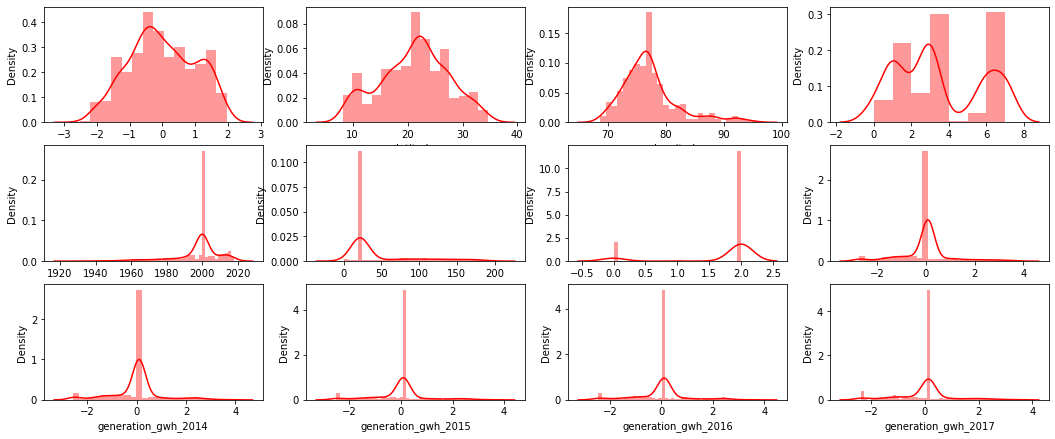

In [171]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

* Splitting the data into x and y

In [20]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [21]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,109,1,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,1,2000.0,174,2,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,7,2000.0,21,2,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,2,2004.0,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,22,2,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2000.0,77,0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,7,2000.0,21,2,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,1,2000.0,59,2,797.063475,805.760000,701.027250,716.728350,807.601700


* Scaling the predictors.

In [22]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

* Creating the Models and Testing

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model=[DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),LinearRegression()]
max_r2_score=0
for r_state in range(30,95):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.3)
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        r2_sc=r2_score(y_test,pred)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i

print("max r2 score correspond to random state",final_state,"is",max_r2_score,"and model is",final_model)

max r2 score correspond to random state 53 is 0.8817061219826401 and model is RandomForestRegressor()


In [26]:
#splitting the data into 70% training and 30% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=53)

* Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score


def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor()]
            


names = ['LR','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 59954.011440, 28806.667559
RF    : 44189.753791, 28035.161274
DTR    : 72073.247248, 35473.024124
GBR    : 47752.309853, 30964.147477


* Choosing random forest regressor as best model as the difference between the the mean score and std score is less.

In [28]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameter={'criterion':['squared_error','mse','absolute_error'],
     'n_estimators':[100, 200],
          'max_depth':range(1,10),
          'max_features':['auto','sqrt','log2']}
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=10,scoring='accuracy',n_jobs=-1)
GCV.fit(x_train,y_train)

GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': 'auto',
 'n_estimators': 100}

In [32]:
final_mod=RandomForestRegressor(criterion='squared_error',max_depth= 1,max_features='auto', n_estimators=100)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.7828365838328797


In [35]:
print('MSE:',mean_squared_error(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('r2_score:',r2_score(y_test,pred))

MSE: 36935.595927901246
MAE: 137.01735515843552
r2_score: 0.7828365838328797


In [36]:
import joblib
joblib.dump(final_mod,'Plant_capacity.obj')

['Plant_capacity.obj']

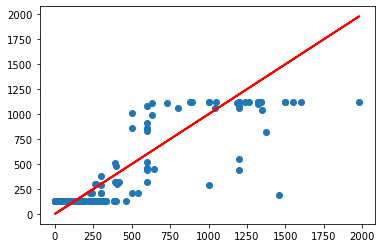

In [37]:
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,linewidth=2,color='Red')

* Classification Model for Primary Fuel Classification

In [38]:
x1=df.drop(['primary_fuel'],axis=1)
y1=df['primary_fuel']

In [39]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [40]:
model=[DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),SVC(),AdaBoostClassifier(),KNeighborsClassifier()]
max_acc_score=0
for r_state in range(40,90):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=r_state,test_size=0.27)
    for i in model:
        i.fit(x1_train,y1_train)
        predx=i.predict(x1_test)
        acc_sc=accuracy_score(y1_test,predx)
        if acc_sc>max_acc_score:
            max_acc_score=acc_sc
            final_state=r_state
            final_model=i

print("max r2 score correspond to random state",final_state,"is",max_r2_score,"and model is",final_model)

max r2 score correspond to random state 60 is 0.8817061219826401 and model is RandomForestClassifier()


In [41]:
#splitting the data into 73% training and 27% testing
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.27,random_state=60)

In [42]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x1,y1,cv=10,scoring='accuracy')
print("cross validation score for Random Forest Classifier:",np.mean(rfc_score))

cross validation score for Random Forest Classifier: 0.8481869254341164


In [202]:
parameter={'n_estimators':[100,200,350],'max_depth':range(2,10),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2']}
GCV2=GridSearchCV(rfc,parameter,cv=10,scoring='accuracy',n_jobs=-1)
GCV2.fit(x1_train,y1_train)
GCV2.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [43]:
final_mod2=RandomForestClassifier(criterion='gini',max_depth= 9,max_features='sqrt', n_estimators=100)
final_mod2.fit(x1_train,y1_train)
pred2=final_mod2.predict(x1_test)
acc1=accuracy_score(y1_test,pred2)
print(acc1)

0.8713692946058091


In [44]:
print("CLASSIFICATION REPORT::\n",classification_report(y1_test,pred2))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.83      0.91      0.86        74
           2       0.43      0.15      0.22        20
           3       0.91      0.98      0.95        65
           4       0.00      0.00      0.00         2
           5       0.20      0.33      0.25         3
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        29

    accuracy                           0.87       241
   macro avg       0.64      0.65      0.64       241
weighted avg       0.85      0.87      0.85       241



In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
y_prob = final_mod2.fit(x1_train,y1_train).predict_proba(x1_test)

macro_roc_auc_ovo = roc_auc_score(y1_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y1_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y1_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y1_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.932673 (macro),
0.943150 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.947221 (macro),
0.969812 (weighted by prevalence)


* Saving the best model

In [2]:
import joblib

In [47]:
joblib.dump(final_mod2,'Fuel_Classification.obj')

['Fuel_Classification.obj']

* Conclusion:

In [48]:
a=np.array(y1_test)
predicted=np.array(final_mod2.predict(x1_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,3,3
1,5,5
2,1,1
3,3,3
4,3,3
...,...,...
236,3,3
237,1,1
238,3,3
239,1,1
